<h2>Fraud: A how-to guide</h2>

In this problem, you will use density modeling to try and ensure that there are no statistical irregularities in data that you have generated yourself.

1) Download the following data containing personal transactions over a period of several years: https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y5GZpr/anonymized.csv

2) Now build a density model for the number of transactions that occur in a single month.

3) Create plots showing the distribution that you’ve created.

4) Draw 10 samples from this density model using scikit.learn.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [213]:
import matplotlib.dates as dates

df = pd.read_csv("transactions.csv")

#convert date from string to datetime
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
#df['month_year'] = df.Date.dt.to_period('M')
#peak
df.head()

,Date,Amount
0,2016-05-25,54241.35
1,2017-05-29,54008.83
2,2017-06-30,54008.82
3,2017-01-05,52704.37
4,2017-02-23,52704.36


In [215]:
import matplotlib.dates as dates
plt_dates = dates.date2num(df['Date'])
plt_dates

array([736109., 736478., 736510., ..., 736229., 736503., 735586.])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


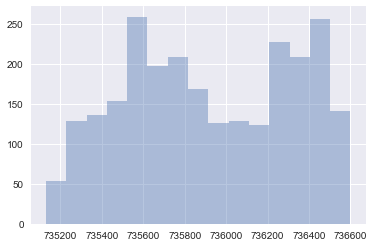

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


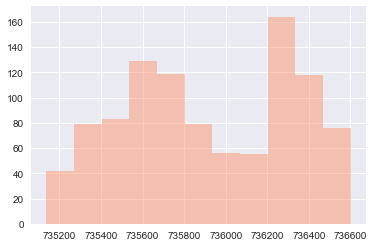

In [235]:
from sklearn.neighbors.kde import KernelDensity

#plot hist and density for original data
X = np.array(plt_dates).reshape(-1, 1)
sns.distplot(X, kde=0)
plt.show()

#plot hist and density for 1000 samples from gaussian kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.8).fit(X)
samples = kde.sample(n_samples=1000)
sns.distplot(samples, color='coral', kde=0)
plt.show()

<h2>Clustering survey data</h2>

In this problem, you will use expectation maximization (EM) on survey data. For the statistical model that we wish to fit, we will assume that everyone comes from one of four clusters.

1) Download the following python script which generates (synthetic) responses to a binary questionnaire: https://course-resources.minerva.kgi.edu/uploaded_files/mke/VNN0ZV/questionnaire.py

2) Use the script to generate an example dataset.

3) Download the following python script which (will) infer which person belonged to which cluster: https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y60gqr/questionnaire-cluster.py In particular you will need to:

- Estimate the probability of a person belonging to a particular cluster.

- Estimates the maximum likelihood parameters for the biases. This is the probability that a person from a particular cluster will answer true to a particular question.

In [226]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

#print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

In [227]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.random.rand(n_people, n_clusters)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases

def maximization(answers, people): 
    # Treating all the data as visible, now infer the parameters for the model. 
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    
    for i in range(n_clusters): 
        biases[:, i] = people[i] * answers[i]
    
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)


[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
[[0.23100454 0.3608617  0.1447486  0.26338516]
 [0.23014913 0.31142387 0.2442255  0.2142015 ]
 [0.28235874 0.38963299 0.27696592 0.05104235]
 ...
 [0.04922842 0.09424983 0.31124    0.54528175]
 [0.22988413 0.20407051 0.25483211 0.31121325]
 [0.24232965 0.33475647 0.33800807 0.08490581]]


In [229]:
answers.shape

(1000, 20)